# Q1

### Reposta Forçada

Dado o Circuito RL em Serie abaixo

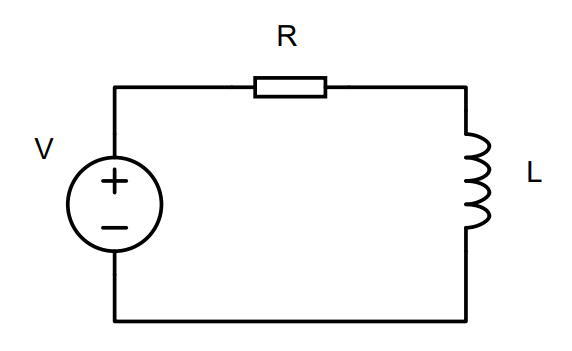

In [15]:
from IPython.display import Image
Image(filename='Rlserie.png')




Usando o equivalentes Norton e Thévinin ficamos com o Circuito abaixo:




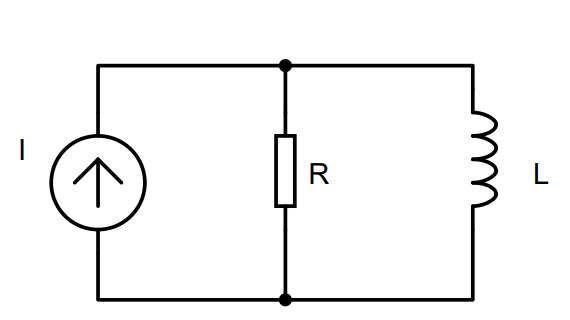

In [16]:
from IPython.display import Image
Image(filename='Rlserie2.png')

Sabemos que em $t \rightarrow 0^+$ nosso indutor se comporta como circuito aberto, isso é assim que começarmos, ou pensarmos em chavear, teremos que $$ V_L(0) = RI $$ e $$ i_L(0) = 0 $$

 Análisando o nó superior e aplicando Kichhoff teremos 
 $$ i_R + i_L = I $$ 
 $$\frac{di_r}{dt} + \frac{di_L}{dt} = 0 $$

 lembrando que $V(0)= RI$ e $V_L(t) = L\frac{di}{dt}$

 logo teremos a EDO $$ \frac{1}{R}\frac{dV}{dt} + \frac{1}{L} V = 0 $$

In [17]:
from math import *
import sympy as sp 

R,t,L,I = sp.symbols("R t L I")
V = sp.Function('V_L')
iL = sp.Function('i_L')

v=sp.dsolve((1/R)*V(t).diff(t)+(1/L)*V(t),V(t))
v



Eq(V_L(t), exp(R*(C1 - t/L)))

Simplifcando ainda mais a edo resolvida, temos que a Tensão no indutor é dada pela função $$ V_L(t) = C_1 \cdot e^{-\frac{R}{L}t}$$
Jogando as condições iniciais $V(0)= RI$, ficamos com 
 $$ V_L(t) = RI \cdot e^{-\frac{R}{L}t}$$ 

 sabendo que $V_L(t) = L\frac{di}{dt}$ basta integrar e dividir por $L$

In [18]:

V = lambda t: R*I*sp.exp(-(R/L)*t)

iL = lambda t: sp.integrate((1/L)*V(t),(t,0,t))

iL(t)

I - I*exp(-R*t/L)

Logo botando em evidência temos $$ i_L(t) = I\cdot(1-e^{-\frac{R}{L}t})$$

Uma vez com as equações bem estabelecidas, vamos considerar um circuito $RL$ em serie com uma fonte $V$ onde as considereções para as constantes foram estabelecidas no código abaixo.

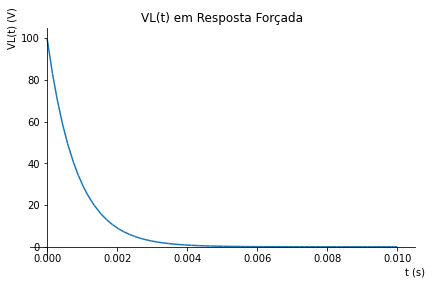

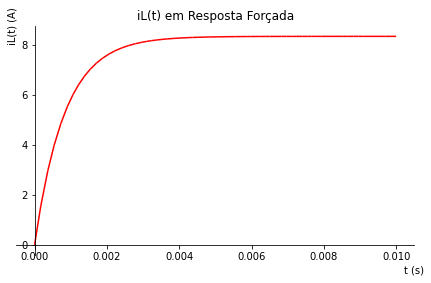

In [19]:
R = 12 
L = 10e-3
V = 100
I = V/R

iL = lambda t: I*(1-sp.exp(-(R/L)*t))
Vl = lambda t: R*I*sp.exp(-(R/L)*t)

sp.plot(Vl(t),(t,0,0.01),xlabel = "t (s)",ylabel="VL(t) (V)", title="VL(t) em Resposta Forçada")
sp.plot(iL(t),(t,0,0.01),xlabel = "t (s)",ylabel="iL(t) (A)", title="iL(t) em Resposta Forçada", line_color = 'red')




Comparando agora na simulação configurada com os mesmo parâmetros temos que o Osciloscopico estipula a mesma curva




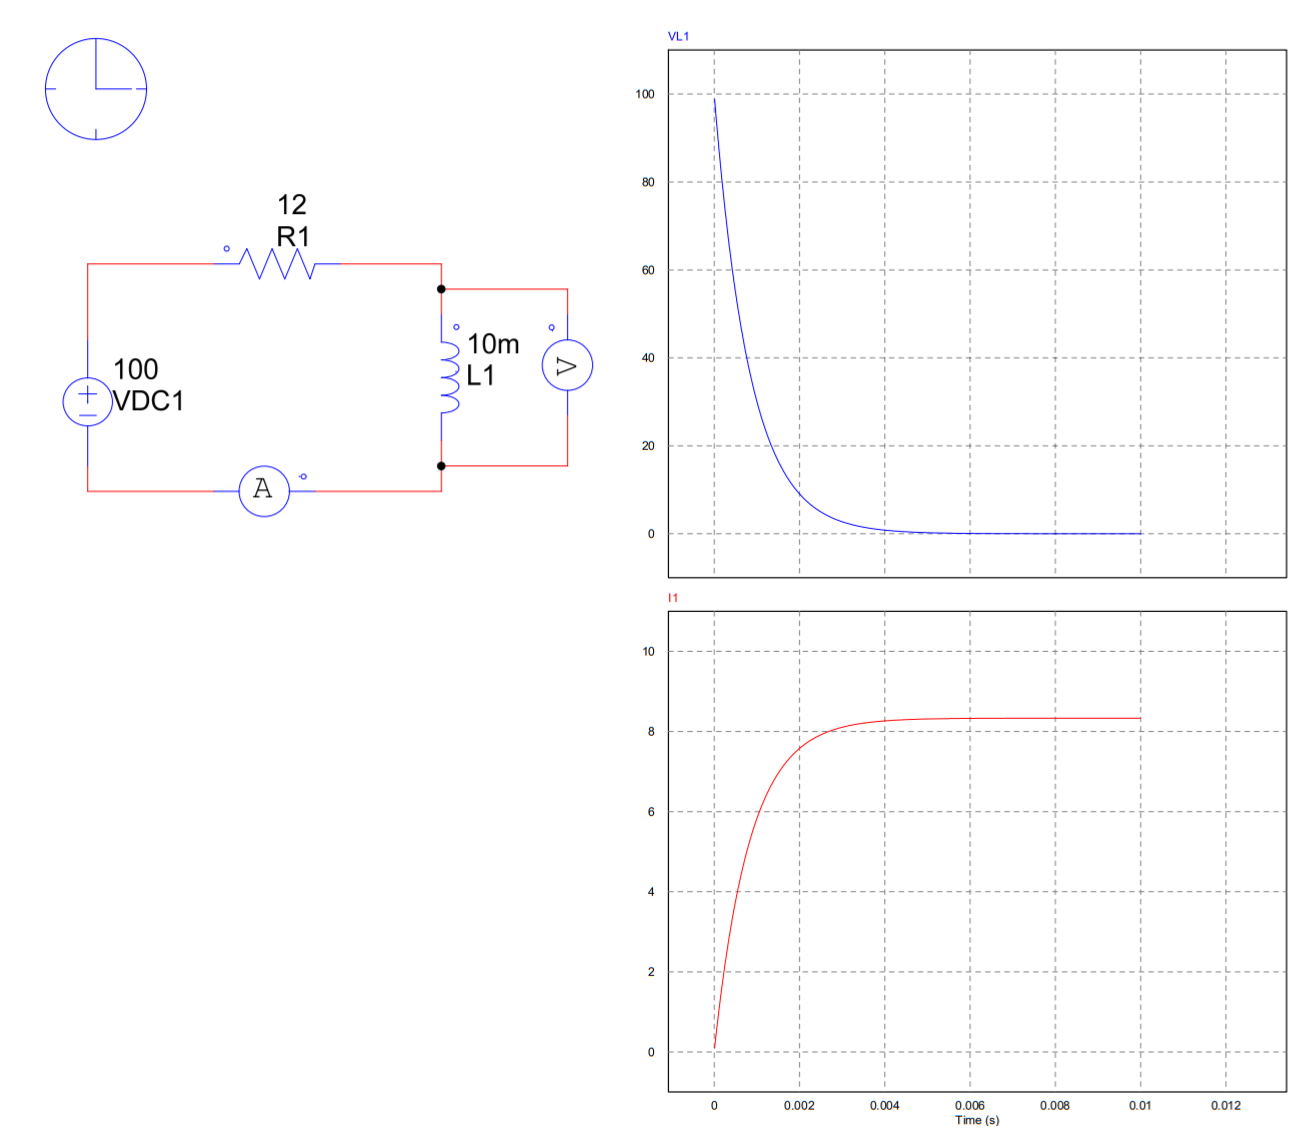

In [20]:
from IPython.display import Image
Image(filename='CircuSimuPsim.png')

Podemos agora fazer uma comparação da resposta forçada através das soluções algébricas para com a simulação do circuito $RL$ em serie no software PSIM, no qual os gráficos a esquerda representam a solução algébrica e já há direita a simulação.



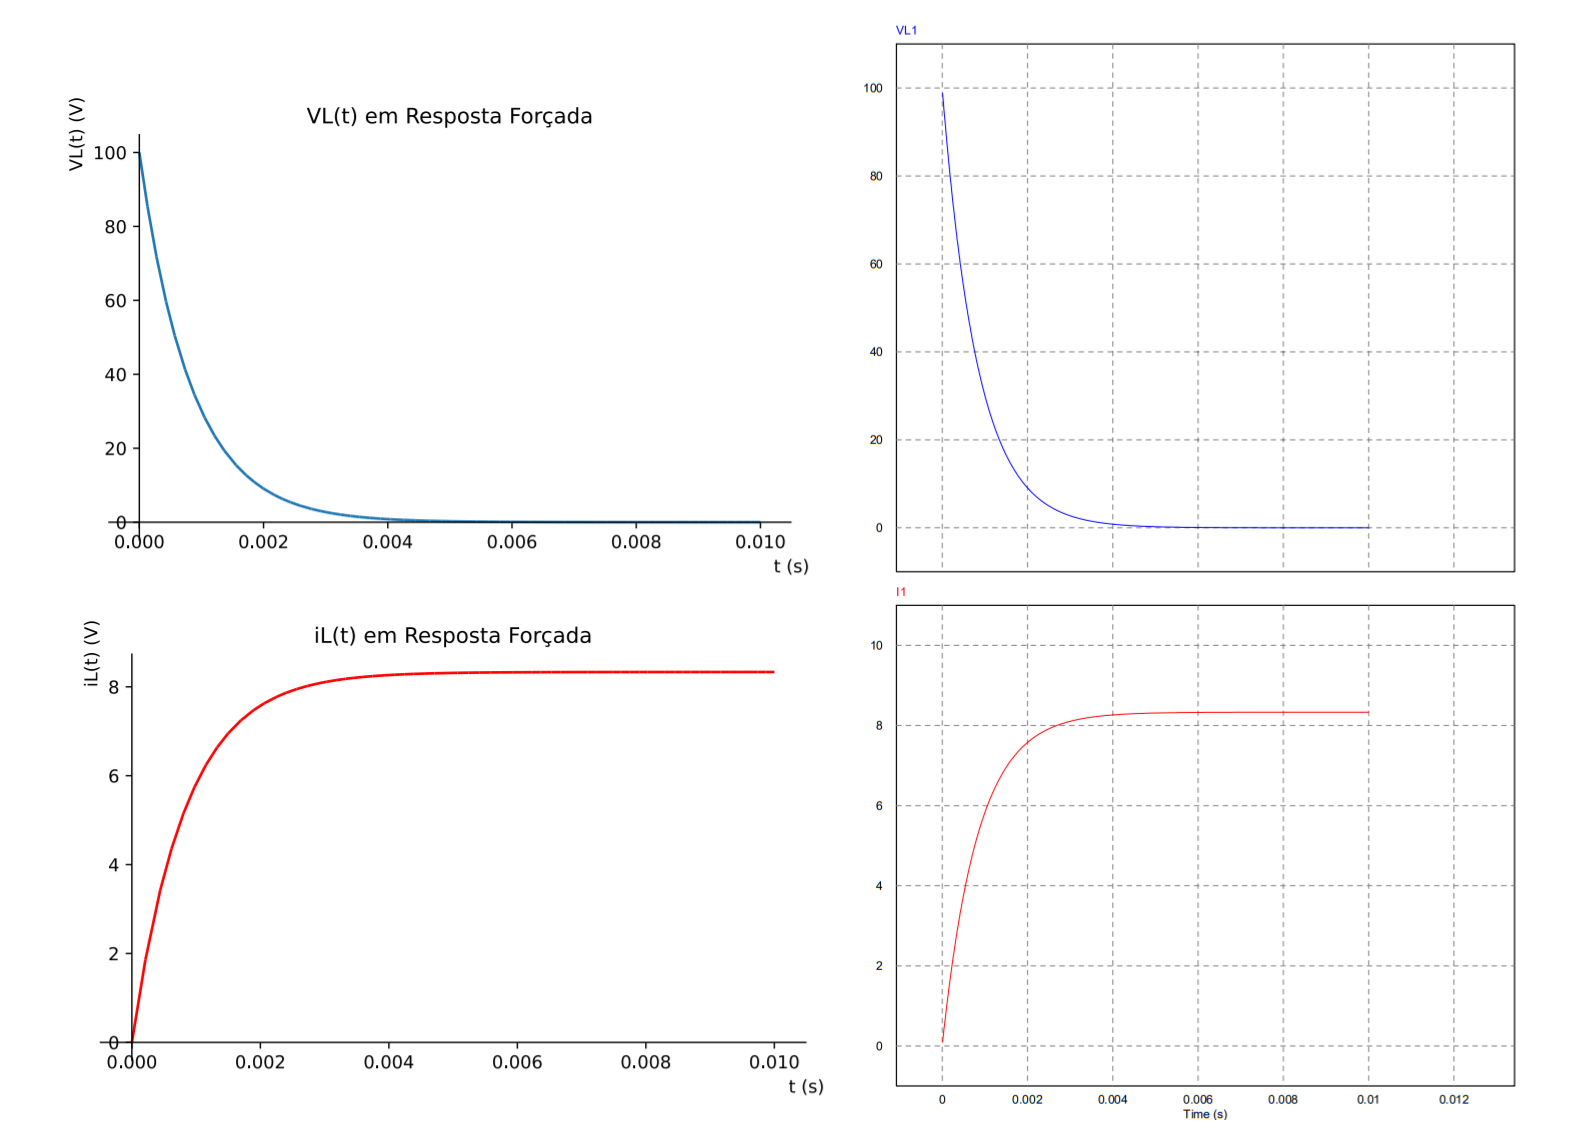

In [21]:
from IPython.display import Image
Image(filename='Comparacao.png')

### Resposta Natural

Agora para a resposta natural vamos admitir as seguintes condições iniciais $i_L(0) = - I_0$ e  $V_L(0) = RI_0$ 


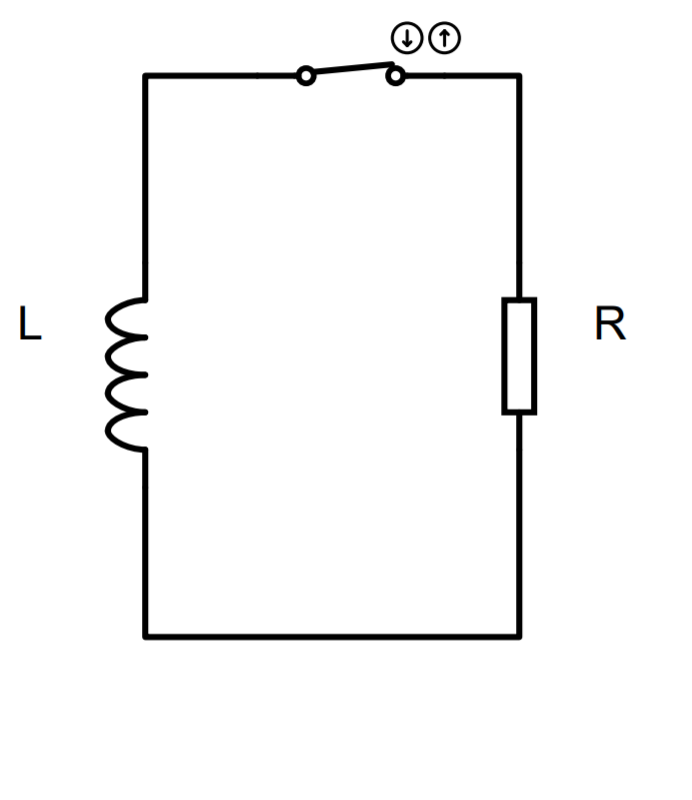

In [22]:
from IPython.display import Image
Image(filename='RLnatura.png')

Aplicando novamente Kirchhoff porém agora no switch (desprezando qualquer resistência nele) teremos que 

$$ V_L(t) + V_R(t) = 0 $$  
$$ L\frac{di(t)}{dt} + R \ i(t) = 0 $$ 

Resolvendo essa EDO 

In [23]:
i = sp.Function('i')
R,L = sp.symbols("R L ")
sp.dsolve( L*i(t).diff(t) + R*i(t), i(t))

Eq(i(t), exp((C1 - R*t)/L))

Jogando as condições iniciais podemos destacar que $C_1 = -I_0$ ficando assim com $$i(t) = -I_0 \cdot e^{-\frac{R}{L}t}$$

sabendo que $$ V_L(t) = L\frac{di}{dt}$$ podemos derivar a função $i(t)$ e multiplicar por $L$ para encontrar a tensão

In [24]:
I0 = sp.Symbol("I_0 ")
Vl1 = sp.Function('V_L')

i = lambda t: -I0*sp.exp(-(R/L)*t)

L*i(t).diff(t)


I_0 *R*exp(-R*t/L)

In [25]:
Vl1 = lambda t: I0*R*sp.exp(-(R/L)*t)

Vl1(t)

I_0 *R*exp(-R*t/L)

Determida as funções iremos agora plotar o gráfico da resposta natural, considerando a simulação no software PSIM e comparando-as e admitindo que o indutor está fornescendo $I_0 = 8A$  inicialmente 



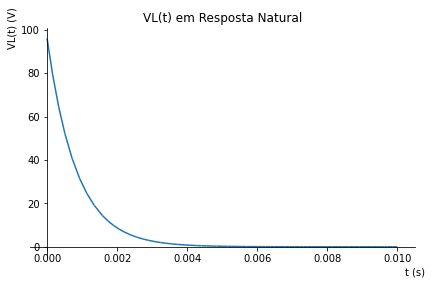

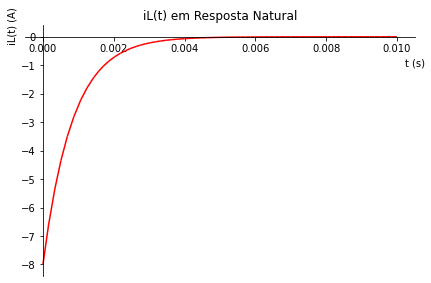

In [26]:
I0 = 8
R = 12
L = 10e-3
sp.plot(Vl1(t),(t,0,0.01),xlabel = "t (s)",ylabel="VL(t) (V)", title="VL(t) em Resposta Natural")
sp.plot(i(t),(t,0,0.01),xlabel = "t (s)",ylabel="iL(t) (A)", title="iL(t) em Resposta Natural", line_color = 'red')

no PSIM 


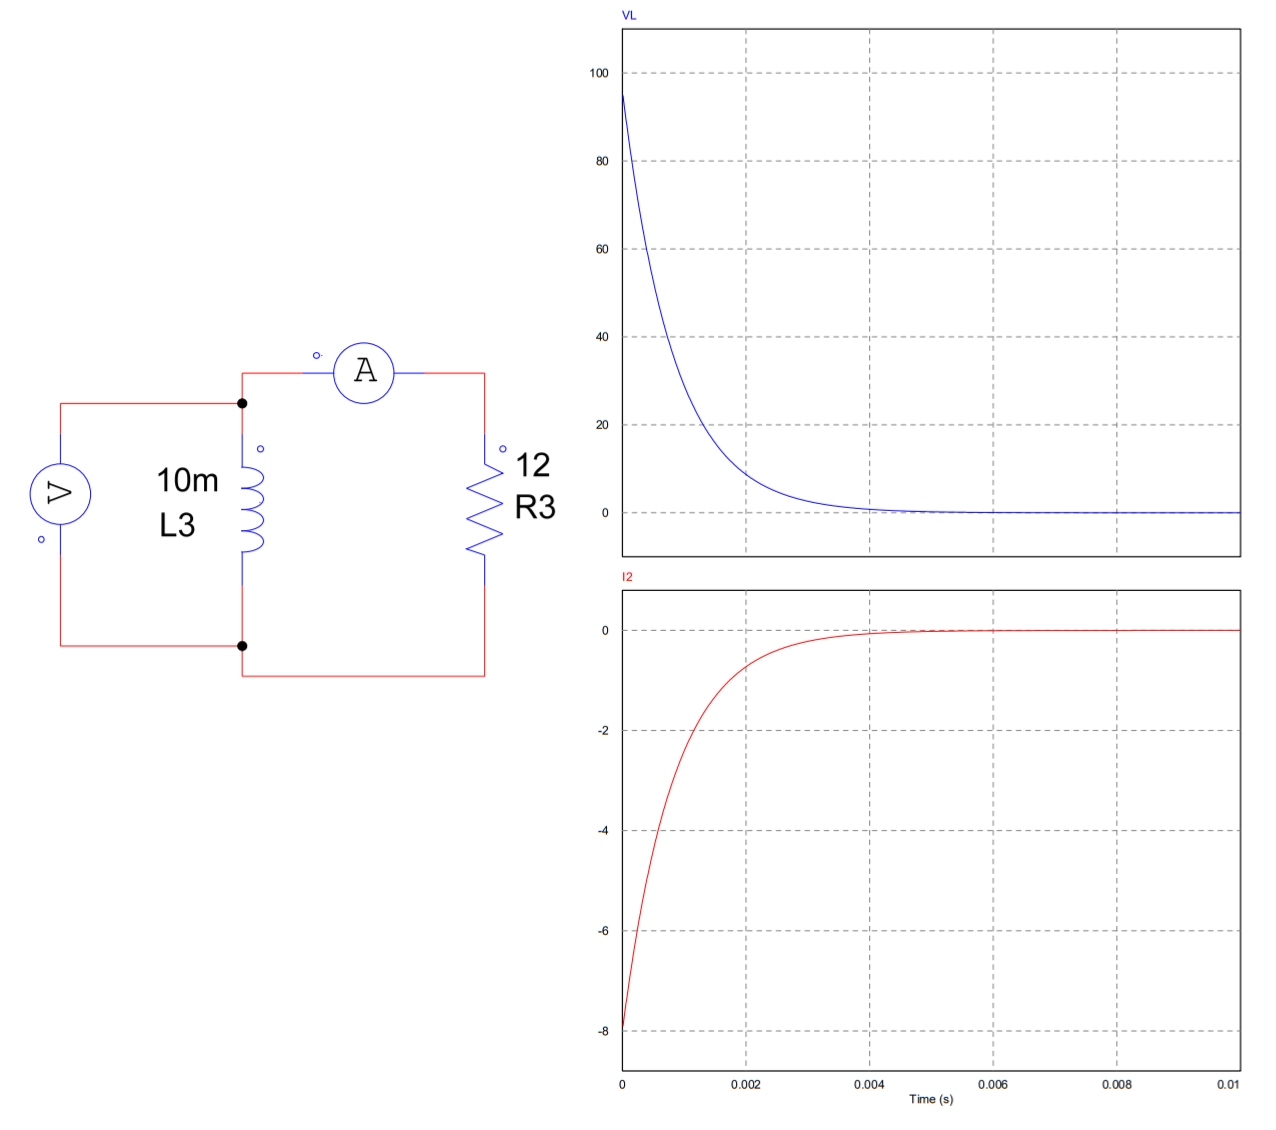

In [27]:
from IPython.display import Image
Image(filename='PSIM_natural.png')

Comparando agora a simulação no PSIM há esquerda, com o Cálculo em python a direita


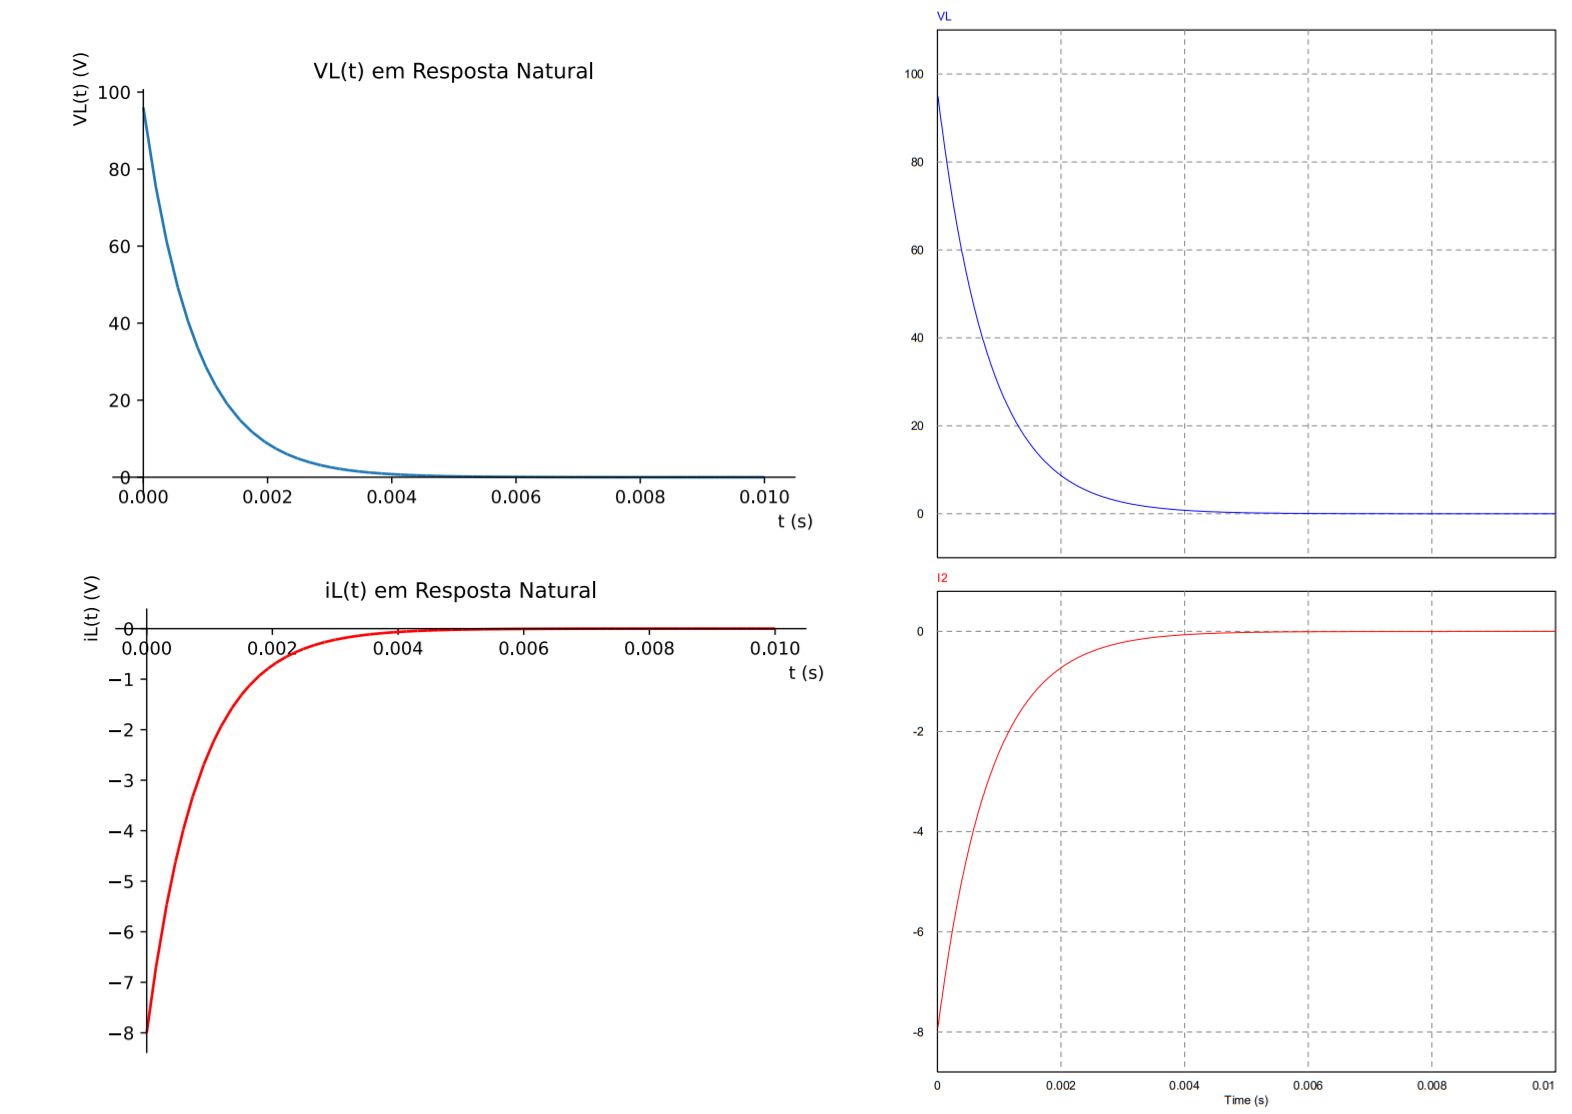

In [28]:
from IPython.display import Image
Image(filename='comparaNatural.png')